This notebook is a step by step guide about how to train a deep neural network (DNN) in the DeepDeconv framework.

In [1]:
## Set up the sys.path in order to be able to import our modules
import os
import sys
module_path = os.path.abspath(os.path.join('../python'))
if module_path not in sys.path:
    sys.path.append(module_path)

# PREPROCESSING OF DATA

## 1) Parametric data

In [2]:
from astropy.io import fits as fits
from matplotlib import pyplot as plt
#Input the directory containing the fits file
data_directory = '/data/DeepDeconv/data/csc_euclidpsfs/'

#Retrieves the list of all the files
import glob

gal_files = glob.glob(data_directory+'image-0*-0.fits')
gal_files.sort()
print(gal_files)

['/data/DeepDeconv/data/csc_euclidpsfs/image-000-0.fits', '/data/DeepDeconv/data/csc_euclidpsfs/image-001-0.fits', '/data/DeepDeconv/data/csc_euclidpsfs/image-002-0.fits', '/data/DeepDeconv/data/csc_euclidpsfs/image-003-0.fits', '/data/DeepDeconv/data/csc_euclidpsfs/image-004-0.fits', '/data/DeepDeconv/data/csc_euclidpsfs/image-005-0.fits', '/data/DeepDeconv/data/csc_euclidpsfs/image-006-0.fits', '/data/DeepDeconv/data/csc_euclidpsfs/image-007-0.fits', '/data/DeepDeconv/data/csc_euclidpsfs/image-008-0.fits', '/data/DeepDeconv/data/csc_euclidpsfs/image-009-0.fits', '/data/DeepDeconv/data/csc_euclidpsfs/image-010-0.fits', '/data/DeepDeconv/data/csc_euclidpsfs/image-011-0.fits', '/data/DeepDeconv/data/csc_euclidpsfs/image-012-0.fits', '/data/DeepDeconv/data/csc_euclidpsfs/image-013-0.fits', '/data/DeepDeconv/data/csc_euclidpsfs/image-014-0.fits', '/data/DeepDeconv/data/csc_euclidpsfs/image-015-0.fits', '/data/DeepDeconv/data/csc_euclidpsfs/image-016-0.fits', '/data/DeepDeconv/data/csc_euc

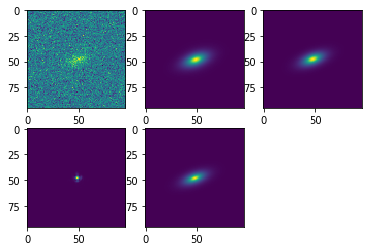

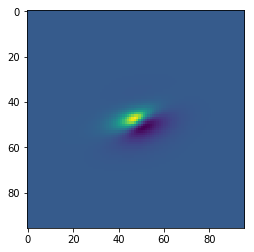

In [3]:
ff=fits.open(gal_files[0])
plt.figure()
for k in range(5):
    plt.subplot(2,3,k+1),plt.imshow(ff[k].data[0:96,0:96])
#HDU 0: noisy
#HDU 1: noise free convolved with euclid PSF
#HDU 2: noise free convolved with large PSF (gauss 0.15 FWHM)
#HDU 3: euclid PSF
#HDU 4: noise free convolved with target PSF (gauss 0.07 FWHM)
plt.figure()
plt.imshow(ff[1].data[0:96,0:96]-ff[0].data[0:96,0:96])
plt.imshow(ff[2].data[0:96,0:96]-ff[1].data[0:96,0:96])

In [4]:
import numpy as np

from DeepDeconv.utils.batch_utils import shuffle_new_fits

data_reshfl_dir=data_directory+"reshuffle/"
noiseless_img_hdu = 1
targets_hdu = 4
psf_hdu = 3
rootname_reshfl=data_reshfl_dir+"image-shfl"
np.random.seed(2012)
shuffle_new_fits(gal_files, nb_img_per_file=10000,
                        noiseless_img_hdu=noiseless_img_hdu, targets_hdu=targets_hdu, psf_hdu=psf_hdu,
                        image_dim=96, image_per_row=100,rootname=rootname_reshfl)


Process file 0
Process subfile 0
Process subfile 1
Process subfile 2
Process subfile 3
Process subfile 4
Process subfile 5
Process subfile 6
Process subfile 7
Process subfile 8
Process subfile 9
Process subfile 10
Process subfile 11
Process subfile 12
Process subfile 13
Process subfile 14
Process subfile 15
Process subfile 16
Process subfile 17
Process subfile 18
Process subfile 19
Process subfile 20
Process file 1
Process subfile 0
Process subfile 1
Process subfile 2
Process subfile 3
Process subfile 4
Process subfile 5
Process subfile 6
Process subfile 7
Process subfile 8
Process subfile 9
Process subfile 10
Process subfile 11
Process subfile 12
Process subfile 13
Process subfile 14
Process subfile 15
Process subfile 16
Process subfile 17
Process subfile 18
Process subfile 19
Process subfile 20
Process file 2
Process subfile 0
Process subfile 1
Process subfile 2
Process subfile 3
Process subfile 4
Process subfile 5
Process subfile 6
Process subfile 7
Process subfile 8
Process subfile

Process subfile 5
Process subfile 6
Process subfile 7
Process subfile 8
Process subfile 9
Process subfile 10
Process subfile 11
Process subfile 12
Process subfile 13
Process subfile 14
Process subfile 15
Process subfile 16
Process subfile 17
Process subfile 18
Process subfile 19
Process subfile 20


In [ ]:
theta=theta=100

In [8]:
from astropy.io import fits as fits
from matplotlib import pyplot as plt
Input the directory containing the fits file
data_directory = '/data/DeepDeconv/data/vsc_euclidpsfs/'

#Retrieves the list of all the files
import glob

gal_files = glob.glob(data_directory+'image-0*-0.fits')
gal_files.sort()
print(gal_files)

import numpy as np

from utils.batch_utils import shuffle_new_fits

data_reshfl_dir=data_directory+"reshuffle/"
noiseless_img_hdu = 1
targets_hdu = 4
psf_hdu = 3
rootname_reshfl=data_reshfl_dir+"image-shfl"
np.random.seed(2012)
shuffle_new_fits(gal_files, nb_img_per_file=10000,
                        noiseless_img_hdu=noiseless_img_hdu, targets_hdu=targets_hdu, psf_hdu=psf_hdu,
                        image_dim=96, image_per_row=100,rootname=rootname_reshfl)


In [9]:
from astropy.io import fits as fits
from matplotlib import pyplot as plt
ff=fits.open(gal_files[0])
plt.figure()
for k in range(5):
    plt.subplot(2,3,k+1),plt.imshow(ff[k].data[0:96,0:96])
#HDU 0: noisy
#HDU 1: noise free convolved with euclid PSF
#HDU 2: noise free convolved with large PSF (gauss 0.15 FWHM)
#HDU 3: euclid PSF
#HDU 4: noise free convolved with target PSF (gauss 0.07 FWHM)
plt.figure()
plt.imshow(ff[1].data[0:96,0:96]-ff[4].data[0:96,0:96])